# DFUC21 Code Submitted by NITS_AS21 Team from Dept. of CSE, NIT Silchar, Assam, India.

**All the code is prepared with the help of the freely available GPU environment of www.kaggle.com**

**Users of this code are requested to make the necessary changes in the input and output directories according to their own systems**

## Read and Preprocess Training Data 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import pandas as pd

dfuDF = pd.read_csv('/kaggle/input/dfudata21/DFUC2021_train/train.csv')
dfuDF.head()

,image,none,infection,ischaemia,both
0,301000.jpg,1.0,0.0,0.0,0.0
1,301001.jpg,1.0,0.0,0.0,0.0
2,301002.jpg,0.0,1.0,0.0,0.0
3,301003.jpg,0.0,1.0,0.0,0.0
4,301004.jpg,0.0,1.0,0.0,0.0


In [3]:
print(dfuDF['none'].sum())
print(dfuDF['infection'].sum())
print(dfuDF['ischaemia'].sum())
print(dfuDF['both'].sum())

2552.0
2555.0
227.0
621.0


In [4]:
print(len(dfuDF))
print(dfuDF['none'].sum)

9949
<bound method Series.sum of 0       1.0
1       1.0
2       0.0
3       0.0
4       0.0
       ... 
9944    NaN
9945    NaN
9946    NaN
9947    NaN
9948    NaN
Name: none, Length: 9949, dtype: float64>


In [5]:
# Drop rows that have NaN values
dfuDF = dfuDF.dropna()
dfuDF.info

<bound method DataFrame.info of            image  none  infection  ischaemia  both
0     301000.jpg   1.0        0.0        0.0   0.0
1     301001.jpg   1.0        0.0        0.0   0.0
2     301002.jpg   0.0        1.0        0.0   0.0
3     301003.jpg   0.0        1.0        0.0   0.0
4     301004.jpg   0.0        1.0        0.0   0.0
...          ...   ...        ...        ...   ...
5950  307026.jpg   0.0        1.0        0.0   0.0
5951  307027.jpg   0.0        1.0        0.0   0.0
5952  307028.jpg   0.0        1.0        0.0   0.0
5953  307029.jpg   1.0        0.0        0.0   0.0
5954  307030.jpg   1.0        0.0        0.0   0.0

[5955 rows x 5 columns]>

In [6]:
# Get the DF values into a list
dfuList = dfuDF.values.tolist()
print(len(dfuList))
print(dfuList[0])

5955
['301000.jpg', 1.0, 0.0, 0.0, 0.0]


In [7]:
import cv2
import matplotlib.pyplot as plt

# The following code can be used to check the shape of all the images. Just FYI, they are all 224x224x3
for i in range(len(dfuList)):
    img = cv2.resize(cv2.imread('/kaggle/input/dfudata21/DFUC2021_train/images/'+dfuList[i][0]),(64,64))
    print(img.shape)
    break


(64, 64, 3)


In [8]:
# Read all the images into lists
allImageList = list()
allLabels = list()


for i in range(len(dfuList)):
    allImageList.append(cv2.resize(cv2.imread('/kaggle/input/dfudata21/DFUC2021_train/images/'+dfuList[i][0]),(64,64)))
    allLabels.append([int(dfuList[i][1]), int(dfuList[i][2]), int(dfuList[i][3]), int(dfuList[i][4])])

In [9]:
import numpy as np
# Convert the lists of images and labels to Numpy arrays
allImages = np.stack(allImageList, axis = 0)
allLabels = np.array(allLabels)

from keras.utils import np_utils

In [10]:
numLabels = list()
for i in range(len(allLabels)):
    if allLabels[i][0] == 1:
        numLabels.append(0)
    elif allLabels[i][1] == 1:
        numLabels.append(1)
    elif allLabels[i][2] == 1:
        numLabels.append(2)
    else:
        numLabels.append(3)

In [11]:
allLabels = np_utils.to_categorical(numLabels)
allLabels.shape

(5955, 4)

In [12]:
# Check the shape
print(allImages.shape)
print(allLabels.shape)

(5955, 64, 64, 3)
(5955, 4)


In [13]:
allImages = allImages.reshape((-1, 64, 64, 3))

In [14]:
# Normalize
allImages = allImages / 255.

In [15]:
del dfuList
del allImageList

In [16]:
# import important packages and perform train validation splitting

import warnings
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
from PIL import Image
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten,Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from sklearn.metrics import confusion_matrix
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D as GAP


# Train test split

xTrain,xVal,yTrain,yVal = train_test_split(allImages,allLabels, test_size=0.20, shuffle = True, stratify = allLabels, random_state=13)

In [17]:
yTrain[0].shape

(4,)

In [18]:
# Check the shape after splitting
print(xTrain.shape)
print(yTrain.shape)
print(xVal.shape)
print(yVal.shape)

(4764, 64, 64, 3)
(4764, 4)
(1191, 64, 64, 3)
(1191, 4)


In [19]:
# Get sample weights to handle the class imbalance problem
import numpy as np
from sklearn.utils.class_weight import compute_class_weight, compute_sample_weight


sample_weights = compute_sample_weight('balanced', yTrain)
print(sample_weights)
print(sample_weights.shape)

[1.90870587 0.29660427 0.29660427 ... 0.29660427 0.29660427 0.29584264]
(4764,)


In [20]:
# RAM is almost full so had to delete redundant data
del allImages

In [21]:
# Prepare the data
img_width, img_height = 64, 64

if K.image_data_format() == 'channels_first': 
    input_shape = (3, img_width, img_height) 
else:
    input_shape = (img_width, img_height, 3) 

In [22]:
! pip install -U efficientnet

     |████████████████████████████████| 50 kB 658 kB/s eta 0:00:01


In [23]:
# PreTrained efficientB0
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
import tensorflow as tf
import efficientnet.keras as efn
IMG_HEIGHT=64
IMG_WIDTH =64
IMG_CHANNELS = 3
input_shape = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
def efficientB0Net_transfer_actual(input_shape):
    res = efn.EfficientNetB0(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH,IMG_CHANNELS))
    for layers in res.layers:
        layers.trainable = True
    model = Sequential()
    model.add(res)
    model.add(Flatten())
    ## The following is the vanilla VGG16 architecture's FC layers
    model.add(Dense(units=4096,activation="relu"))
    model.add(Dense(units=4096,activation="relu"))
    model.add(Dense(units=1000,activation="relu"))
    model.add(Dense(units=4, activation="softmax"))
    #model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

In [24]:
# DenseNet Small
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense, Activation,AvgPool2D,Reshape, Dropout,multiply, Flatten,Conv2D, MaxPool2D, ReLU,concatenate,GlobalAvgPool2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import GlobalAveragePooling2D as GAP

def DenseNetSmall(input_shape, n_classes=4, f = 32):
    def bn_rl_conv(x,f,k=1,s=1):
        x = BatchNormalization()(x)
        x = ReLU()(x)
        x = Conv2D(f, k, strides = s, padding ='same')(x)
        return x
    def dense_block(x,r):
        for _ in range(r):
            y = bn_rl_conv(x,4*f)
            y = bn_rl_conv(x,f,3)
            y = bn_rl_conv(x,f,5)
            #x = squeeze_excite_block(y)
            x = concatenate([y,x])
            x = BAM(x)
            return x
       
    def transition_layer(x):
        x = bn_rl_conv(x,K.int_shape(x)[-1] // 2)
        x = AvgPool2D(2, strides = 2, padding ='same')(x)
        return x
        
    input = Input(input_shape)
    x = Conv2D(64, 5, strides = 2, padding ='same')(input)
    x = MaxPool2D(3, strides = 2, padding ='same')(x)
    for i in [6,12,48]:
        d = dense_block(x,6)
        x = transition_layer(d)
    x = GlobalAvgPool2D()(d)
    output = Dense(n_classes,kernel_regularizer = 'l2',bias_regularizer='l2',activity_regularizer='l2', activation ='softmax')(x)
    model = Model(input,output)
    return model

In [26]:
#PreTrained DenseNet121
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
import tensorflow as tf
from keras.applications.densenet import DenseNet121
IMG_HEIGHT=64
IMG_WIDTH =64
IMG_CHANNELS = 3
input_shape = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
def DenseNet121_transfer_actual(input_shape):
    res = DenseNet121(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH,IMG_CHANNELS))
    for layers in res.layers:
        layers.trainable = True
    model = Sequential()
    model.add(res)
    model.add(Flatten())
    ## The following is the vanilla VGG16 architecture's FC layers
    model.add(Dense(units=4096,activation="relu"))
    model.add(Dense(units=4096,activation="relu"))
    model.add(Dense(units=1000,activation="relu"))
    model.add(Dense(units=4, activation="softmax"))
    #model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

In [27]:
ptDenModel = DenseNet121_transfer_actual(input_shape)
denSmModel = DenseNetSmall(input_shape)
ptEffModel = efficientB0Net_transfer_actual(input_shape)

29089792/29084464 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Functional)     (None, 2, 2, 1024)        7037504   
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 4096)              16781312  
_________________________________________________________________
dense_1 (Dense)              (None, 4096)              16781312  
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              4097000   
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 4004      
Total params: 44,701,132
Trainable params: 44,617,484
Non

In [28]:
from tensorflow.keras.optimizers import Adam, SGD
adamOpt = Adam(learning_rate=0.01)
sgdOpt = SGD(learning_rate=0.001, momentum=0.9)
ptDenModel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
ptEffModel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
denSmModel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Model Training

Epoch 1/300
149/149 [==============================] - 26s 76ms/step - loss: 1.9978 - accuracy: 0.3486 - val_loss: 4.2881 - val_accuracy: 0.4374
Epoch 2/300
149/149 [==============================] - 8s 52ms/step - loss: 0.6112 - accuracy: 0.4935 - val_loss: 1.1540 - val_accuracy: 0.5181
Epoch 3/300
149/149 [==============================] - 8s 57ms/step - loss: 0.5279 - accuracy: 0.5544 - val_loss: 1.7270 - val_accuracy: 0.4156
Epoch 4/300
149/149 [==============================] - 8s 57ms/step - loss: 0.5369 - accuracy: 0.6003 - val_loss: 0.8031 - val_accuracy: 0.6104
Epoch 5/300
149/149 [==============================] - 8s 57ms/step - loss: 0.3873 - accuracy: 0.6588 - val_loss: 0.8127 - val_accuracy: 0.6037
Epoch 6/300
149/149 [==============================] - 9s 58ms/step - loss: 0.3560 - accuracy: 0.6517 - val_loss: 1.5433 - val_accuracy: 0.4400
Epoch 7/300
149/149 [==============================] - 8s 53ms/step - loss: 0.3514 - accuracy: 0.6703 - val_loss: 0.8573 - val_accuracy

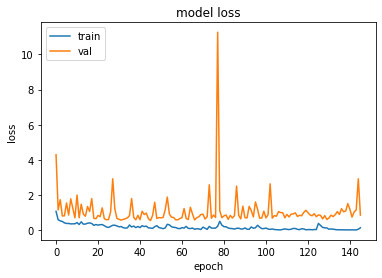

In [29]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100, restore_best_weights=True)



history = ptEffModel.fit(xTrain, yTrain, sample_weight = sample_weights,
              epochs=300,
              verbose=1,
              validation_data = (xVal, yVal),
              callbacks = [es]
             )

# Plot the training and validation losses

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

history = ptDenModel.fit(xTrain, yTrain, sample_weight = sample_weights,
              epochs=300,
              verbose=1,
              validation_data = (xVal, yVal),
              callbacks = [es]
             )

# Plot the training and validation losses

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

history = denSmModel.fit(xTrain, yTrain, sample_weight = sample_weights,
              epochs=300,
              verbose=1,
              validation_data = (xVal, yVal),
              callbacks = [es]
             )

# Plot the training and validation losses

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [30]:
# Model oading code after saving
# ptEffModel = tf.keras.models.load_model('/kaggle/input/dfusavedmodels/PretrainedEfficientNetB0.h5', compile=False)
# denSmModel = tf.keras.models.load_model('/kaggle/input/dfusavedmodels/DenseNetSmall_Regularization.h5', compile=False)
# ptEffModel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# denSmModel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Code for evaluating pseudo validation set performance.
# score = model.evaluate(xVal, yVal,
#                        batch_size=100, verbose=1)
# print('Validation accuracy:', score[1])
# pred = ptDenModel.predict(xVal)
# valPred = list()
# for i in range(len(pred)):
#     valPred.append(list(pred[i]))
# print(len(valPred))
# print(valPred[0])
# print(yVal[0])

# yValLabels = list()
# valPredLabels = list()
# for i in range(len(yVal)):
#     yValLabels.append(np.argmax(yVal[i]))
#     valPredLabels.append(np.argmax(valPred[i]))
# print('\n\n')
# print(yValLabels)
# print('\n\n')
# print(valPredLabels)
# from sklearn.metrics import classification_report

# print(classification_report(yValLabels,valPredLabels))

## Test Set Predictions

In [45]:
import os
testPath = '/kaggle/input/dfutest2021/DFUC2021_test/'
filenames = os.listdir('/kaggle/input/dfutest2021/DFUC2021_test')
filenums = list()
for i in range(len(filenames)):
    filenums.append(int(filenames[i].strip('.jpg')))
print(len(filenums))
print(filenums[0])
filenums.sort()
print(filenums[10])
testPathsOrdered = list()
for i in range(len(filenums)):
    testPathsOrdered.append(testPath+str(filenums[i])+'.jpg')
for i in range(10):
    print(testPathsOrdered[i])

5734
505431
501010
/kaggle/input/dfutest2021/DFUC2021_test/501000.jpg
/kaggle/input/dfutest2021/DFUC2021_test/501001.jpg
/kaggle/input/dfutest2021/DFUC2021_test/501002.jpg
/kaggle/input/dfutest2021/DFUC2021_test/501003.jpg
/kaggle/input/dfutest2021/DFUC2021_test/501004.jpg
/kaggle/input/dfutest2021/DFUC2021_test/501005.jpg
/kaggle/input/dfutest2021/DFUC2021_test/501006.jpg
/kaggle/input/dfutest2021/DFUC2021_test/501007.jpg
/kaggle/input/dfutest2021/DFUC2021_test/501008.jpg
/kaggle/input/dfutest2021/DFUC2021_test/501009.jpg


In [46]:
allTest = list()
for i in range(len(testPathsOrdered)):
    allTest.append(cv2.resize(cv2.imread(testPathsOrdered[i]),(64,64)))

allTest = np.stack(allTest, axis = 0)
print(allTest.shape)
allTest = allTest.reshape((-1, 64, 64, 3))
print(allTest.shape)
allTest = allTest / 255.

(5734, 64, 64, 3)
(5734, 64, 64, 3)


In [48]:
predTestPTEff = ptEffModel.predict(allTest)
testPredPTEff = list()
for i in range(len(predTestPTEff)):
    testPredPTEff.append(list(predTestPTEff[i]))
print(len(testPredPTEff))

5734


In [49]:
predTestPTDen = ptDenModel.predict(allTest)
testPredPTDen = list()
for i in range(len(predTestPTDen)):
    testPredPTDen.append(list(predTestPTDen[i]))
print(len(testPredPTDen))

5734


In [51]:
predTestDenSm = denSmModel.predict(allTest)
testPredDenSm = list()
for i in range(len(predTestDenSm)):
    testPredDenSm.append(list(predTestDenSm[i]))
print(len(testPredDenSm))

5734


In [54]:
ensPredProb = list()
for i in range(len(testPredPTEff)):
    first = ((testPredPTEff[i][0]+testPredPTDen[i][0]+testPredDenSm[i][0])/3)
    second = ((testPredPTEff[i][1]+testPredPTDen[i][1]+testPredDenSm[i][1])/3)
    third = ((testPredPTEff[i][2]+testPredPTDen[i][2]+testPredDenSm[i][2])/3)
    fourth = ((testPredPTEff[i][3]+testPredPTDen[i][3]+testPredDenSm[i][3])/3)
    ensPredProb.append([first,second,third,fourth])
print(len(ensPredProb))
print(ensPredProb[0])

5734
[0.08567601442337036, 0.7472574710845947, 0.00020757909320915738, 0.16685895125071207]


In [57]:
orderedFilenames = list()
for i in range(len(filenums)):
    orderedFilenames.append(str(filenums[i])+'.jpg')
print(orderedFilenames[0])
print(orderedFilenames[1])

501000.jpg
501001.jpg


In [58]:
testCSVList = list()
for i in range(len(orderedFilenames)):
    testCSVList.append([orderedFilenames[i],ensPredProb[i][0],ensPredProb[i][1],ensPredProb[i][2],ensPredProb[i][3]])
print(testCSVList[0])

['501000.jpg', 0.08567601442337036, 0.7472574710845947, 0.00020757909320915738, 0.16685895125071207]


In [60]:
testPredDF = pd.DataFrame(testCSVList, columns = ['image','none','infection','ischaemia','both'])
testPredDF.head()

,image,none,infection,ischaemia,both
0,501000.jpg,0.085676,0.747257,0.000208,0.166859
1,501001.jpg,0.006991,0.046057,0.350114,0.596838
2,501002.jpg,0.299906,0.700049,0.000020,0.000026
3,501003.jpg,0.523449,0.473046,0.000873,0.002632
4,501004.jpg,0.158503,0.457090,0.323646,0.060761


In [61]:
testPredDF.to_csv('testPredEns_PTEff_PTDen_DenSm.csv')

## Validation Set Predictions

In [62]:
# /kaggle/input/dfu-val2021/DFU_Val2021/

r1 = 501000
r2 = 501500

fileNums = [item for item in range(r1, r2+1)]
print(len(fileNums))
fileNums.remove(501023)
print(len(fileNums))

501
500


In [64]:
allTVal = list()
for i in range(len(fileNums)):
    allTVal.append(cv2.resize(cv2.imread('/kaggle/input/dfu-val2021/DFU_Val2021/'+str(fileNums[i])+'.jpg'),(64,64)))

allTVal = np.stack(allTVal, axis = 0)
print(allTVal.shape)
allTVal = allTVal.reshape((-1, 64, 64, 3))
print(allTVal.shape)
allTVal = allTVal / 255.

(500, 64, 64, 3)
(500, 64, 64, 3)


In [66]:
# Get the Pretrained EfficientNetB0 Predictions
predTValPTEff = ptEffModel.predict(allTVal)
valPredTPTEff = list()
for i in range(len(predTValPTEff)):
    valPredTPTEff.append(list(predTValPTEff[i]))
print(len(valPredTPTEff))

# Get the Pretrained DenseNet Predictions
predTValPTDen = ptDenModel.predict(allTVal)
valPredTPTDen = list()
for i in range(len(predTValPTDen)):
    valPredTPTDen.append(list(predTValPTDen[i]))
print(len(valPredTPTDen))

predTValDenSm = denSmModel.predict(allTVal)
valPredTDenSm = list()
for i in range(len(predTValDenSm)):
    valPredTDenSm.append(list(predTValDenSm[i]))
print(len(valPredTDenSm))

ensVPredProb = list()
for i in range(len(valPredTPTEff)):
    first = ((valPredTPTEff[i][0]+valPredTPTDen[i][0]+valPredTDenSm[i][0])/3)
    second = ((valPredTPTEff[i][1]+valPredTPTDen[i][1]+valPredTDenSm[i][1])/3)
    third = ((valPredTPTEff[i][2]+valPredTPTDen[i][2]+valPredTDenSm[i][2])/3)
    fourth = ((valPredTPTEff[i][3]+valPredTPTDen[i][3]+valPredTDenSm[i][3])/3)
    ensVPredProb.append([first,second,third,fourth])
print(len(ensVPredProb))
print(ensVPredProb[0])

500
500
500
500
[0.08567601442337036, 0.7472574710845947, 0.00020757909320915738, 0.16685895125071207]


In [67]:
fileNames = list()

for i in range(len(fileNums)):
    fileNames.append(str(fileNums[i])+'.jpg')

In [68]:
predProbList = ensVPredProb[:]
print(predProbList[0])

[0.08567601442337036, 0.7472574710845947, 0.00020757909320915738, 0.16685895125071207]


In [69]:
# Create a combined list consisting of both filenames and pred probas

tValPredComplete = list()

for i in range(len(fileNames)):
    tempList = list()
    tempList.append(fileNames[i])
    tempList.append(predProbList[i][0])
    tempList.append(predProbList[i][1])
    tempList.append(predProbList[i][2])
    tempList.append(predProbList[i][3])
    tValPredComplete.append(tempList)
    
print(len(tValPredComplete))
print(tValPredComplete[0])

500
['501000.jpg', 0.08567601442337036, 0.7472574710845947, 0.00020757909320915738, 0.16685895125071207]


In [70]:
tValDF = pd.DataFrame(tValPredComplete, columns = ['image','none','infection','ischaemia','both'])
tValDF.head()

,image,none,infection,ischaemia,both
0,501000.jpg,0.085676,0.747257,0.000208,0.166859
1,501001.jpg,0.006991,0.046057,0.350114,0.596838
2,501002.jpg,0.299906,0.700049,0.000020,0.000026
3,501003.jpg,0.523449,0.473046,0.000873,0.002632
4,501004.jpg,0.158503,0.457090,0.323646,0.060761


In [71]:
tValDF.to_csv('tValPredComplete.csv')